In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import glob
import codecs
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import prepare
pd.set_option("display.max_columns", None)
plt.style.use('dark_background')

In [2]:
fr = pd.read_csv('Federer_Rivalries.csv')
fr.winner.value_counts()

Roger Federer     55
Novak Djokovic    21
Rafael Nadal      19
Andy Murray       10
Andy Roddick       3
Name: winner, dtype: int64

In [3]:
PlayerData = pd.read_csv('PlayerData.csv')
player_list = ['Roger Federer', 'Andy Roddick', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']
# grand_list = ['Roland Garros', 'Wimbledon', 'US Open', 'Australian Open']
# grand_df = Fed_Rivalry[Fed_Rivalry['tourney_name'].isin(grand_list)]
top_players = PlayerData[PlayerData['Player_Name'].isin(player_list)]

In [121]:
PlayerData.shape

(382, 50)

In [5]:
lower_players = PlayerData[PlayerData['MaxRank'] > 30]

In [120]:
rank1 =  PlayerData[PlayerData['MaxRank'] ==  1]
rank1.shape

(13, 50)

In [6]:
top_players.agg('mean'), lower_players.agg('mean')

/Users/daniels/opt/anaconda3/lib/python3.8/site-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


(Unnamed: 0                                  686.400000
 PlayerID                                 104492.000000
 Age                                          23.925530
 Height                                      187.200000
 MaxRank                                       1.000000
 win_count                                   648.800000
 lose_count                                  162.000000
 match_count                                 810.800000
 win%                                          0.794000
 aces_in_match_lost                          992.600000
 aces_in_match_won                          4174.600000
 ace_count                                  5167.200000
 aces_per_game                                 6.612800
 first_serve_percentage_match_lost             0.619370
 first_serve_percentage_match_won              0.642273
 first_serve_won_percentage_match_lost         0.677804
 first_serve_won_percentage_match_won          0.780320
 second_serve_count                        12041

In [7]:
### US AND Australia Hard
### French Clay
### Wimby Grass

In [8]:
PlayerData = pd.read_csv('PlayerData.csv')
PlayerData.head(1)

,Unnamed: 0,PlayerID,Player_Name,Age,Height,MaxRank,Hand,Country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,second_serve_count,second_serve_match%,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,0,103720,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.7,1034.0,2823.0,3857.0,5.898,0.525558,0.539098,0.675974,0.77347,12096.0,18.495,407.0,1947.0,2354.0,3.599388,134.0,110.0,351.0,184.0,244.0,535.0,0.54918,0.656075,265.0,118.0,383.0,0.691906,85.0,46.0,131.0,0.648855,93.0,27.0,120.0,0.775,15.0,5.0,20.0,0.75


In [9]:
PlayerData.groupby('Player_Name')[['win%']].agg('sum').sort_values(by='win%', ascending=False)

,win%
Player_Name,
Rafael Nadal,0.84
Novak Djokovic,0.82
Roger Federer,0.81
Andy Murray,0.76
Andre Agassi,0.75
...,...
Denis Kudla,0.29
Thierry Ascione,0.28
Tomas Zib,0.27


In [10]:
PlayerData.groupby('Player_Name')[['ace_count']].agg('sum').sort_values(by='ace_count', ascending=False)

,ace_count
Player_Name,
Ivo Karlovic,10076.0
John Isner,9227.0
Roger Federer,8370.0
Feliciano Lopez,6814.0
Andy Roddick,6303.0
...,...
Thomas Fabbiano,125.0
Maximo Gonzalez,117.0
Flavio Cipolla,72.0


In [11]:
PlayerData.groupby('Player_Name')[['breakpoints_won_match_won']].agg('sum').sort_values(by='breakpoints_won_match_won', ascending=False)

,breakpoints_won_match_won
Player_Name,
Roger Federer,3238.0
Rafael Nadal,3207.0
Novak Djokovic,2819.0
David Ferrer,2583.0
Andy Murray,2167.0
...,...
Thierry Ascione,47.0
Chris Guccione,41.0
Rui Machado,38.0


In [117]:
PlayerData.groupby('Player_Name')[['second_serve_match%']].agg('sum').sort_values(by='second_serve_match%', ascending=False)

,second_serve_match%
Player_Name,
Wayne Arthurs,20.510
Andrei Stoliarov,20.507
Gianluca Pozzi,20.394
Jared Donaldson,19.924
Jens Knippschild,19.903
...,...
Potito Starace,10.055
Victor Estrella,9.254
Alberto Berasategui,8.549


In [12]:
# win_aces = df.groupby('winner_id')[['w_ace']].agg('sum').reset_index()
# win_aces = win_aces.rename(columns={'winner_id' : 'PlayerID', 'win_count':'ace_count_win'})

In [13]:
df = pd.read_csv('ATPMain.csv')
df = prepare.prepare_atp()


In [14]:
df.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-11,1999-338,Sydney,Hard,32,A,16,7-6(1) 6-1,3,R32,84.0,Lleyton Hewitt,Patrick Rafter,17.878166,26.036961,R,R,180.0,185.0,103720,102158,AUS,AUS,104.0,4.0,456.0,3315.0,NaN,2.0,2.0,0.0,0.0,5.0,73.0,59.0,51.0,36.0,32.0,24.0,14.0,8.0,10.0,9.0,4.0,3.0,6.0,7.0,Lleyton Hewitt,0.69863,0.610169,0.627451,0.666667,4.0,2.0,True,False,True,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [15]:
fed_matches = df[(df.player_1 == 'Roger Federer') | (df.player_2 == 'Roger Federer')]
fed_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-02-01,1999-496,Marseille,Hard,32,A,25,6-3 6-3,3,QF,70.0,Arnaud Clement,Roger Federer,21.125257,17.483915,R,R,173.0,185.0,103096,103819,FRA,SUI,103.0,243.0,472.0,173.0,NaN,NaN,1.0,3.0,2.0,6.0,45.0,65.0,23.0,37.0,21.0,21.0,9.0,11.0,9.0,9.0,1.0,5.0,3.0,10.0,Arnaud Clement,0.511111,0.569231,0.913043,0.567568,5.0,2.0,True,False,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1999-02-01,1999-496,Marseille,Hard,32,A,17,6-7(6) 7-6(5) 7-6(5),3,R16,140.0,Jerome Golmard,Roger Federer,25.396304,17.483915,L,R,188.0,185.0,102259,103819,FRA,SUI,63.0,243.0,743.0,173.0,NaN,NaN,14.0,12.0,8.0,5.0,121.0,115.0,67.0,73.0,54.0,63.0,30.0,19.0,18.0,18.0,4.0,3.0,6.0,5.0,Roger Federer,0.553719,0.634783,0.805970,0.863014,2.0,2.0,False,False,False,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1999-02-01,1999-496,Marseille,Hard,32,A,1,7-6(1) 3-6 6-3,3,R32,113.0,Carlos Moya,Roger Federer,22.431211,17.483915,R,R,190.0,185.0,102845,103819,ESP,SUI,5.0,243.0,3178.0,173.0,1.0,NaN,9.0,3.0,2.0,10.0,105.0,110.0,52.0,46.0,37.0,36.0,28.0,32.0,15.0,15.0,6.0,5.0,9.0,8.0,Roger Federer,0.495238,0.418182,0.711538,0.782609,3.0,3.0,False,True,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1999-02-15,1999-407,Rotterdam,Carpet,32,A,23,6-4 7-5,3,R16,65.0,Bohdan Ulihrach,Roger Federer,23.978097,17.522245,R,R,188.0,185.0,102539,103819,CZE,SUI,30.0,178.0,1155.0,262.0,NaN,NaN,5.0,10.0,4.0,3.0,70.0,55.0,41.0,37.0,33.0,31.0,12.0,13.0,11.0,11.0,5.0,0.0,7.0,0.0,Roger Federer,0.585714,0.672727,0.804878,0.837838,0.0,2.0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1999-02-15,1999-407,Rotterdam,Carpet,32,A,28,6-1 5-7 6-4,3,QF,109.0,Roger Federer,Yevgeny Kafelnikov,17.522245,24.991102,R,R,185.0,190.0,103819,102338,SUI,RUS,178.0,2.0,262.0,3350.0,NaN,2.0,6.0,6.0,6.0,6.0,93.0,93.0,39.0,57.0,25.0,38.0,27.0,18.0,14.0,15.0,10.0,3.0,16.0,7.0,Yevgeny Kafelnikov,0.419355,0.612903,0.641026,0.666667,4.0,6.0,False,False,True,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07,2019-5014,Shanghai Masters,Hard,64,M,286,7-6(7) 6-4,3,R16,114.0,David Goffin,Roger Federer,28.832307,38.162902,R,R,180.0,185.0,105676,103819,BEL,SUI,14.0,3.0,2190.0,7130.0,13.0,2.0,2.0,8.0,3.0,1.0,89.0,83.0,49.0,60.0,29.0,43.0,26.0,13.0,11.0,11.0,3.0,2.0,5.0,3.0,Roger Federer,0.550562,0.722892,0.591837,0.716667,1.0,2.0,False,True

In [16]:
df.tourney_level.value_counts()

A    20061
M     8122
G     7277
F      295
D      212
Name: tourney_level, dtype: int64

In [17]:
df['tourney_level'].replace({'A': 'ATP', 'M': 'Masters', 'G': 'Grand_Slams', 'F': 'Finals', 'D': 'Davis'}, inplace = True)


In [18]:
levels = ['ATP', 'Finals', 'Grand Slams', 'Masters']

In [19]:
df['tourney_level']

tourney_date
1999-01-11      ATP
1999-01-11      ATP
1999-01-11      ATP
1999-01-11      ATP
1999-01-11      ATP
              ...  
2019-11-23    Davis
2019-11-23    Davis
2019-11-23    Davis
2019-11-23    Davis
2019-11-24    Davis
Name: tourney_level, Length: 35967, dtype: object

In [20]:
def clean_for_model(df):

#     df = df[['tourney_id', 'draw_size', 'winner', 'surface',
#        'tourney_level', 'best_of', 'player_1', 'player_2', 'player_1_age',
#        'player_2_age', 'player_1_hand',
#        'player_2_hand', 'player_1_ht', 'player_2_ht', 'player_1_ioc', 'player_2_ioc', 'player_1_name',
#        'player_2_name', 'player_1_rank', 'player_2_rank',
#        'player_1_rank_points', 'player_2_rank_points', 'player_1_wins', 'round_ER', 'round_F', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_RR', 'round_SF', 'player_1_hand_R', 'player_1_hand_L', 
#        'tourney_level_A', 'tourney_level_D', 'tourney_level_F', 'tourney_level_G', 'tourney_level_M', 'surface_Carpet', 'surface_Clay',
#        'surface_Grass', 'surface_Hard']].copy(0)
#     # drop null rows in specific columns
#     df = df[df.player_1_ht.notnull()]
#     df = df[df.player_2_ht.notnull()]

    # winner and loser rank columns
    #df['winner_rank'] = np.where(df['winner'] == df['player_1_name'], df['player_1_rank'], df['player_2_rank'])
    #df['loser_rank'] = np.where(df['winner'] == df['player_2_name'], df['player_1_rank'], df['player_2_rank'])
    
    df['winner_rank'] = np.where(df['winner'] == df['player_1'], df['player_1_rank'], df['player_2_rank'])
    df['loser_rank'] = np.where(df['winner'] == df['player_2'], df['player_1_rank'], df['player_2_rank'])

    # Calculate the difference in stats between player1 and playeer2. Save to new column. 
    df['ht_diff'] = df.player_1_ht - df.player_2_ht
    df['age_diff'] = df.player_1_age - df.player_2_age
    df['rank_diff'] = df.player_1_rank - df.player_2_rank
    df['rank_points_diff'] = df.player_1_rank_points - df.player_2_rank_points

    # upset column
    df['no_upset'] = df['winner_rank'] < df['loser_rank']

    # year column
    df['year'] = (df['tourney_id'].str[0:4]).astype(int)

    return df

In [21]:
df = clean_for_model(df)

In [22]:
#Player 1 is always alphabetically first - Andy
Rodrick_Federer = df[df.player_1 == 'Andy Roddick']
#Player 2 will be Roger
Rodrick_Federer = Rodrick_Federer[Rodrick_Federer.player_2 == 'Roger Federer']
Rodrick_Federer['year'] = (Rodrick_Federer['tourney_id'].str[0:4]).astype(int)
Rodrick_Federer.winner.value_counts()


Roger Federer    14
Andy Roddick      3
Name: winner, dtype: int64

In [23]:
Rodrick_Federer.year

tourney_date
2001-10-22    2001
2003-06-23    2003
2003-08-04    2003
2003-11-10    2003
2004-06-21    2004
2004-07-26    2004
2005-06-20    2005
2005-08-15    2005
2006-08-28    2006
2006-11-13    2006
2007-01-15    2007
2007-08-27    2007
2007-11-12    2007
2008-03-27    2008
2009-01-19    2009
2009-03-25    2009
2012-03-21    2012
Name: year, dtype: int64

In [24]:
def rod_fed_bar():
    years = [i for i in range(2001, 2013)]
    fedwins = [0 for i in range(2001, 2013)]
    rodwins = [0 for i in range(2001, 2013)]

    for index, row in Rodrick_Federer.iterrows():
        if row['winner'] == "Andy Roddick":
            rodwins[row['year'] - 2001] += 1
        elif row['winner'] == "Roger Federer":
            fedwins[row['year'] - 2001] += 1
    plt.figure(figsize=(12,8))

    #barwith and position
    barWidth = 0.4
    r1 = np.arange(len(fedwins))
    r2 = [x + barWidth for x in r1]

    # Make the plotdfff4f
    plt.bar(r1, fedwins, color='#3C638E', width=barWidth, edgecolor='white', label='Federer wins')
    plt.bar(r2, rodwins, color='#dfff4f', width=barWidth, edgecolor='white', label='Roddick wins')

    # Add xticks on the middle of the group bars
    plt.title('Plotting Roger Federer vs Andy Roddick over the years', fontweight='bold')
    plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(2001, 2013)])
    plt.xlabel("Year")
    plt.ylabel("# of Wins");

    # Create legend & Show graphic
    plt.legend();

In [25]:
def get_pie_wins(Rodrick_Federer):
    '''get pie chart for percent of wins'''

    # set values and labels for chart
    values = [len(Rodrick_Federer.player_1_wins[Rodrick_Federer.player_1_wins == True]), len(Rodrick_Federer.player_1_wins[Rodrick_Federer.player_1_wins == False])] 
    labels = ['Roddick Wins','Federer Wins', ] 

    # generate and show chart
    plt.pie(values, labels=labels, autopct='%.0f%%', textprops={'fontsize': 16, 'color':"orange"}, colors=['#dfff4f', '#3C638E'])
    #plt.title('Games Ending in Federer winning Represents over 80% of the time in the last 20 years', fontsize = 12)
    plt.show()

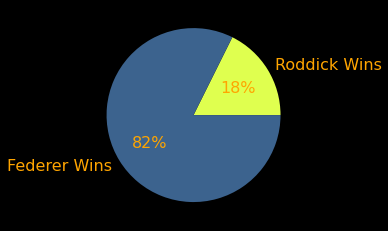

In [26]:
get_pie_wins(Rodrick_Federer)

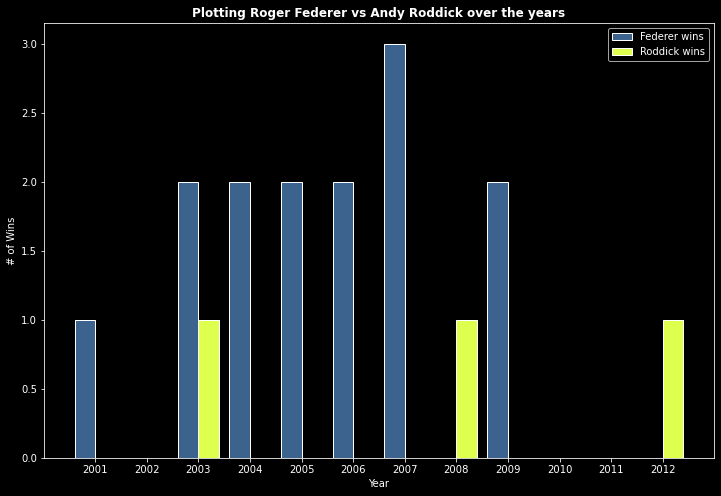

In [27]:
rod_fed_bar()

In [28]:
fed_v_rod1 = df[df.player_1.isin(['Andy Roddick']) & df.player_2.isin(['Roger Federer'])] 
Roger_Federer1 = df[df.player_1.isin(['Roger Federer'])] 
Roger_Federer2 = df[df.player_2.isin(['Roger Federer'])] 
Andy_rodray1 = df[df.player_1.isin(['Andy Roddick'])]
Andy_rodray2 = df[df.player_2.isin(['Andy Roddick'])] 

In [29]:
def get_pies_upsets(fed_v_rod1):
    "create pie charts showing upset percentage for having and not having the first move"

    # create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    # create pie chart and assign to axis object
    values = [len(fed_v_rod1.no_upset[(fed_v_rod1.player_1_wins == True) & (fed_v_rod1.no_upset == True)]),
            len(fed_v_rod1.no_upset[(fed_v_rod1.player_1_wins == True) & (fed_v_rod1.no_upset == False)])]
    labels = ['Roddick Wins', 'Federer Wins']

    ax1.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
    ax1.title.set_text('High Ranked Player Wins')

    # create pie chart and and assign to axis object
    values = [len(fed_v_rod1.no_upset[(fed_v_rod1.player_1_wins == False) & (fed_v_rod1.no_upset == True)]),
            len(fed_v_rod1.no_upset[(fed_v_rod1.player_1_wins == False) & (fed_v_rod1.no_upset == False)])]
    labels = ['Roddick Wins', 'Federer Wins'] 

    ax2.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
    ax2.title.set_text('Lower Ranked Player Wins')

    # display charts
    plt.tight_layout()
    plt.show()

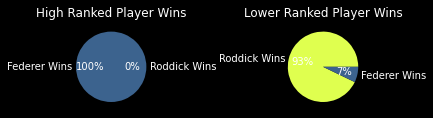

In [30]:
get_pies_upsets(fed_v_rod1)

In [31]:
def get_pie_tourney_level(fed_v_rod1):
    '''get pie chart of player win percentage for each tourney level'''

    # activate subplots objects
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    # list of charts to be generated
    levels = ['ATP', 'Finals', 'Grand_Slams', 'Masters']

    # generate graphs and assign them to subplots
    for level, ax in zip(levels, axs.ravel()):
        
        values = [len(fed_v_rod1.player_1_wins[(fed_v_rod1.player_1_wins == True) & (fed_v_rod1.tourney_level == level)]), len(fed_v_rod1.player_1_wins[(fed_v_rod1.player_1_wins == False) & (fed_v_rod1.tourney_level == level)])] 
        labels = ['Roddick Wins','Federer Wins']
        
        ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
        ax.set_title(f'Win Percentage for tourney {level}')
    
    # display chart
    plt.tight_layout()
    plt.show()

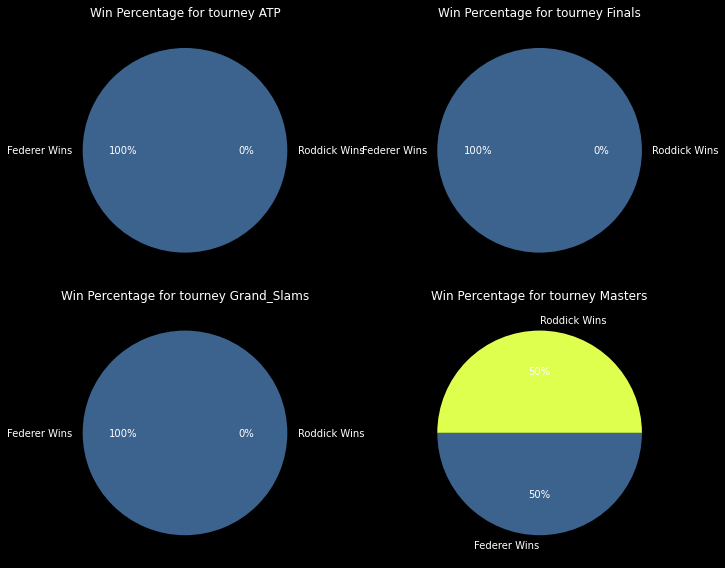

In [32]:
get_pie_tourney_level(fed_v_rod1)

In [33]:
####################################

In [34]:
from datetime import datetime

#Player 1 is always alphabetically first - Andy
Murray_Federer = df[df.player_1 == 'Andy Murray']
#Player 2 will be Roger
Murray_Federer = Murray_Federer[Murray_Federer.player_2 == 'Roger Federer']
#creating year column
Murray_Federer['year'] = (Murray_Federer['tourney_id'].str[0:4]).astype(int)

#They played 20 matches against each other
#Murray_Federer.winner.value_counts()

In [35]:
Murray_Federer.count()

tourney_id          20
tourney_name        20
surface             20
draw_size           20
tourney_level       20
                    ..
age_diff            20
rank_diff           20
rank_points_diff    20
no_upset            20
year                20
Length: 86, dtype: int64

In [36]:
def get_pie_wins(Murray_Federer):
    '''get pie chart for percent of wins'''

    # set values and labels for chart
    values = [len(Murray_Federer.player_1_wins[Murray_Federer.player_1_wins == True]), len(Murray_Federer.player_1_wins[Murray_Federer.player_1_wins == False])] 
    labels = ['Murray Wins','Federer Wins', ] 

    # generate and show chart
    plt.pie(values, labels=labels, autopct='%.0f%%', shadow=False, textprops={'color':"orange", 'fontsize': 12}, colors=['#dfff4f', '#3C638E'])
    #plt.title('Games Ending in Federer winning Represents 1/2 of the time in the last 20 years')
    plt.show()

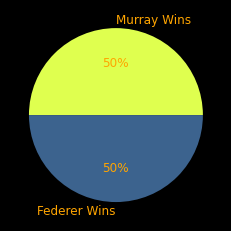

In [37]:
get_pie_wins(Murray_Federer)

In [38]:
def rod_mur_bar():
    years = [i for i in range(2004, 2017)]
    fedwins = [0 for i in range(2004, 2017)]
    murwins = [0 for i in range(2004, 2017)]

    for index, row in Murray_Federer.iterrows():
        if row['winner'] == "Andy Murray":
            murwins[row['year'] - 2004] += 1
        elif row['winner'] == "Roger Federer":
            fedwins[row['year'] - 2004] += 1
    plt.figure(figsize=(12,8))

    #barwith and position
    barWidth = 0.4
    r1 = np.arange(len(fedwins))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, fedwins, color='#3C638E', width=barWidth, edgecolor='white', label='Federer wins')
    plt.bar(r2, murwins, color='#dfff4f', width=barWidth, edgecolor='white', label='Murray wins')

    # Add xticks on the middle of the group bars
    plt.title('Plotting Roger Federer vs Andy Murray over the years', fontweight='bold')
    plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(2004, 2017)])
    plt.xlabel("Year")
    plt.ylabel("# of Wins")

    # Create legend & Show graphic
    plt.legend()

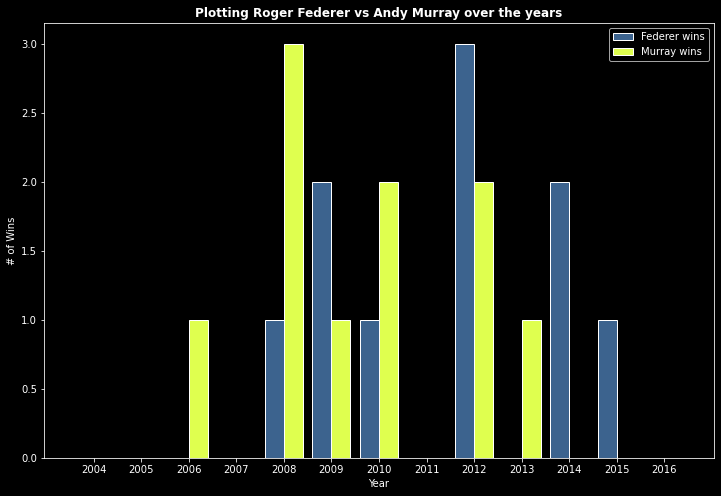

In [39]:
rod_mur_bar()

In [40]:
fed_v_mur1 = df[df.player_1.isin(['Andy Murray']) & df.player_2.isin(['Roger Federer'])] 
Roger_Federer1 = df[df.player_1.isin(['Roger Federer'])] 
Roger_Federer2 = df[df.player_2.isin(['Roger Federer'])] 
Andy_rodray1 = df[df.player_1.isin(['Andy Murray'])]
Andy_rodray2 = df[df.player_2.isin(['Andy Murray'])] 

In [41]:
def get_pies_upsets(fed_v_mur1):
    "create pie charts showing upset percentage for having and not having the first move"

    # create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    # create pie chart and assign to axis object
    values = [len(fed_v_mur1.no_upset[(fed_v_mur1.player_1_wins == True) & (fed_v_mur1.no_upset == True)]),
            len(fed_v_mur1.no_upset[(fed_v_mur1.player_1_wins == True) & (fed_v_mur1.no_upset == False)])]
    labels = ['Murray Wins', 'Federer Wins']

    ax1.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
    ax1.title.set_text('High Ranked Player Wins')

    # create pie chart and and assign to axis object
    values = [len(fed_v_mur1.no_upset[(fed_v_mur1.player_1_wins == False) & (fed_v_mur1.no_upset == True)]),
            len(fed_v_mur1.no_upset[(fed_v_mur1.player_1_wins == False) & (fed_v_mur1.no_upset == False)])]
    labels = ['Murray Wins', 'Federer Wins'] 

    ax2.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
    ax2.title.set_text('Lower Ranked Player Wins')

    # display charts
    plt.tight_layout()
    plt.show()

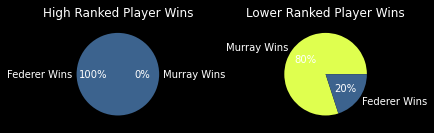

In [42]:
get_pies_upsets(fed_v_mur1)

In [43]:
def get_pie_tourney_level(fed_v_mur1):
    '''get pie chart of player win percentage for each tourney level'''

    # activate subplots objects
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    # list of charts to be generated
    levels = ['ATP', 'Finals', 'Grand_Slams', 'Masters']

    # generate graphs and assign them to subplots
    for level, ax in zip(levels, axs.ravel()):
        
        values = [len(fed_v_mur1.player_1_wins[(fed_v_mur1.player_1_wins == True) & (fed_v_mur1.tourney_level == level)]), len(fed_v_mur1.player_1_wins[(fed_v_mur1.player_1_wins == False) & (fed_v_mur1.tourney_level == level)])] 
        labels = ['Murray Wins','Federer Wins']
        
        ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
        ax.set_title(f'Win Percentage for tourney {level}')
    
    # display chart
    plt.tight_layout()
    plt.show()

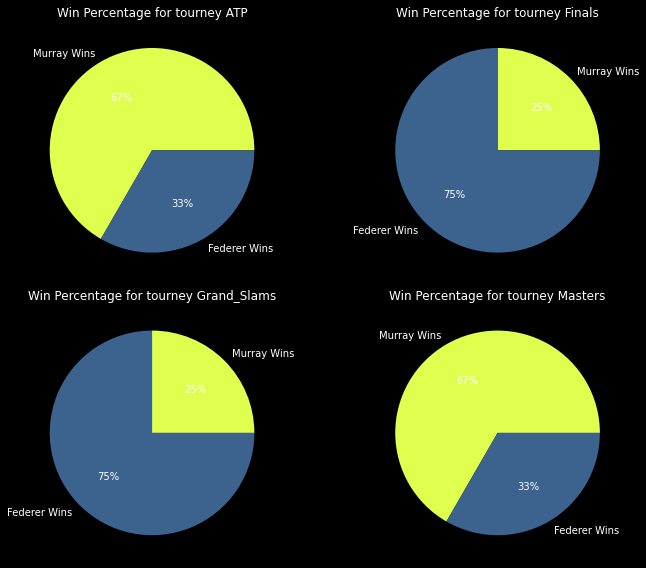

In [44]:
get_pie_tourney_level(fed_v_mur1)

In [45]:
########### NADAL AND FEDERER

In [46]:
#Player 1 is always alphabetically first - Rafae
Nadal_Federer = df[df.player_1 == 'Rafael Nadal']
#Player 2 will be Roger
Nadal_Federer = Nadal_Federer[Nadal_Federer.player_2 == 'Roger Federer']
Nadal_Federer['year'] = (Nadal_Federer['tourney_id'].str[0:4]).astype(int)


In [47]:
Nadal_Federer.count()

tourney_id          30
tourney_name        30
surface             30
draw_size           30
tourney_level       30
                    ..
age_diff            30
rank_diff           30
rank_points_diff    30
no_upset            30
year                30
Length: 86, dtype: int64

In [48]:
Nadal_Federer.winner.value_counts()

Rafael Nadal     19
Roger Federer    11
Name: winner, dtype: int64

In [133]:
Nadal_Federer[Nadal_Federer.surface == "Clay"].shape

(12, 86)

Clay 12 

In [49]:
def rod_nad_bar():
    years = [i for i in range(2003, 2020)]
    fedwins = [0 for i in range(2003, 2020)]
    nadwins = [0 for i in range(2003, 2020)]

    for index, row in Nadal_Federer.iterrows():
        if row['winner'] == "Rafael Nadal":
            nadwins[row['year'] - 2003] += 1
        elif row['winner'] == "Roger Federer":
            fedwins[row['year'] - 2003] += 1
    plt.figure(figsize=(12,8))

    #barwith and position
    barWidth = 0.4
    r1 = np.arange(len(fedwins))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, fedwins, color='#3C638E', width=barWidth, edgecolor='white', label='Federer wins')
    plt.bar(r2, nadwins, color='#dfff4f', width=barWidth, edgecolor='white', label='Nadal wins')

    # Add xticks on the middle of the group bars
    plt.title('Plotting Roger Federer vs Rafael Nadal over the years', fontweight='bold')
    plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(2003, 2020)])
    plt.xlabel("Year")
    plt.ylabel("# of Wins");

    # Create legend & Show graphic
    plt.legend();

In [50]:
def get_pie_wins(Nadal_Federer):
    '''get pie chart for percent of wins'''

    # set values and labels for chart
    values = [len(Nadal_Federer.player_1_wins[Nadal_Federer.player_1_wins == True]), len(Nadal_Federer.player_1_wins[Nadal_Federer.player_1_wins == False])] 
    labels = ['Nadal Wins','Federer Wins', ] 

    # generate and show chart
    plt.pie(values, labels=labels, autopct='%.0f%%', textprops={'fontsize': 12}, colors=['#dfff4f', '#3C638E'])
    plt.title('Games Ending in Federer winning Represents 1/2 of the time in the last 20 years')
    plt.show()

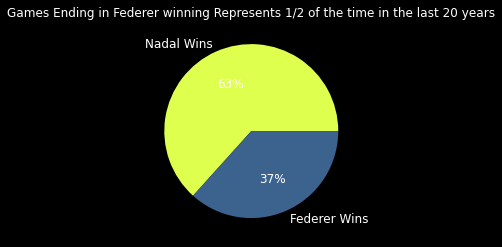

In [51]:
get_pie_wins(Nadal_Federer)

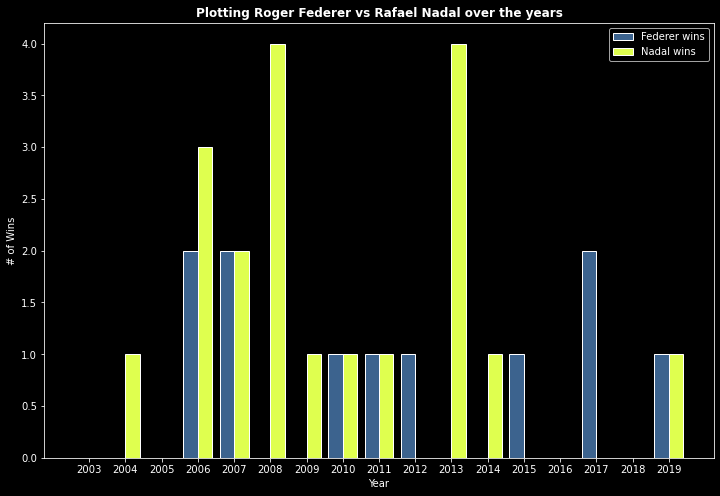

In [52]:
rod_nad_bar()

In [53]:
fed_v_nad1 = df[df.player_1.isin(['Rafael Nadal']) & df.player_2.isin(['Roger Federer'])] 
Roger_Federer1 = df[df.player_1.isin(['Roger Federer'])] 
Roger_Federer2 = df[df.player_2.isin(['Roger Federer'])] 
Andy_rodray1 = df[df.player_1.isin(['Rafael Nadal'])]
Andy_rodray2 = df[df.player_2.isin(['Rafael Nadal'])] 

In [54]:
def get_pies_upsets(fed_v_nad1):
    "create pie charts showing upset percentage for having and not having the first move"

    # create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    # create pie chart and assign to axis object
    values = [len(fed_v_nad1.no_upset[(fed_v_nad1.player_1_wins == True) & (fed_v_nad1.no_upset == True)]),
            len(fed_v_nad1.no_upset[(fed_v_nad1.player_1_wins == True) & (fed_v_nad1.no_upset == False)])]
    labels = ['Nadal Wins', 'Federer Wins']

    ax1.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
    ax1.title.set_text('High Ranked Player Wins')

    # create pie chart and and assign to axis object
    values = [len(fed_v_nad1.no_upset[(fed_v_nad1.player_1_wins == False) & (fed_v_nad1.no_upset == True)]),
            len(fed_v_nad1.no_upset[(fed_v_nad1.player_1_wins == False) & (fed_v_nad1.no_upset == False)])]
    labels = ['Nadal Wins', 'Federer Wins'] 

    ax2.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
    ax2.title.set_text('Lower Ranked Player Wins')

    # display charts
    plt.tight_layout()
    plt.show()

In [55]:
def get_pie_tourney_level(fed_v_nad1):
    '''get pie chart of player win percentage for each tourney level'''

    # activate subplots objects
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    # list of charts to be generated
    levels = ['ATP', 'Finals', 'Grand_Slams', 'Masters']

    # generate graphs and assign them to subplots
    for level, ax in zip(levels, axs.ravel()):
        
        values = [len(fed_v_nad1.player_1_wins[(fed_v_nad1.player_1_wins == True) & (fed_v_nad1.tourney_level == level)]), len(fed_v_nad1.player_1_wins[(fed_v_nad1.player_1_wins == False) & (fed_v_nad1.tourney_level == level)])] 
        labels = ['Nadal Wins','Federer Wins']
        
        ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
        ax.set_title(f'Win Percentage for tourney {level}')
    
    # display chart
    plt.tight_layout()
    plt.show()

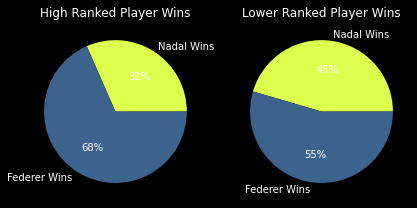

In [56]:
get_pies_upsets(fed_v_nad1)

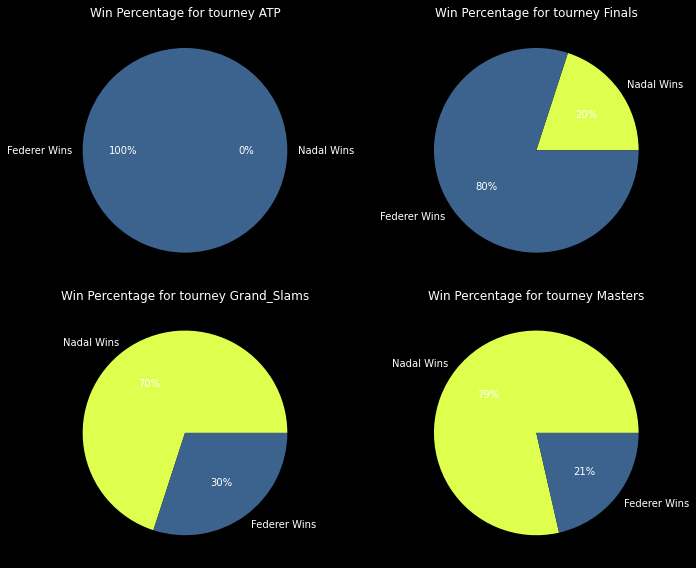

In [57]:
get_pie_tourney_level(fed_v_nad1)

In [58]:
#Player 1 is always alphabetically first - Novak
Djokovic_Federer = df[df.player_1 == 'Novak Djokovic']
#Player 2 will be Roger
Djokovic_Federer = Djokovic_Federer[Djokovic_Federer.player_2 == 'Roger Federer']
Djokovic_Federer['year'] = (Djokovic_Federer['tourney_id'].str[0:4]).astype(int)

In [59]:
Djokovic_Federer.winner.value_counts()

Novak Djokovic    21
Roger Federer     20
Name: winner, dtype: int64

In [60]:
Djokovic_Federer.winner

tourney_date
2006-04-17     Roger Federer
2007-01-15     Roger Federer
2007-02-26     Roger Federer
2007-08-27     Roger Federer
2008-01-14    Novak Djokovic
2008-04-20     Roger Federer
2008-08-25     Roger Federer
2009-03-25    Novak Djokovic
2009-04-27    Novak Djokovic
2009-08-16     Roger Federer
2009-08-31     Roger Federer
2010-08-09     Roger Federer
2010-08-30    Novak Djokovic
2010-10-10     Roger Federer
2010-11-21     Roger Federer
2011-01-17    Novak Djokovic
2011-02-21    Novak Djokovic
2011-08-29    Novak Djokovic
2012-05-13    Novak Djokovic
2012-05-27    Novak Djokovic
2012-06-25     Roger Federer
2012-08-12     Roger Federer
2012-11-05    Novak Djokovic
2013-10-28    Novak Djokovic
2013-11-04    Novak Djokovic
2014-02-24     Roger Federer
2014-03-06    Novak Djokovic
2014-04-13     Roger Federer
2014-06-23    Novak Djokovic
2014-10-05     Roger Federer
2015-02-23     Roger Federer
2015-03-12    Novak Djokovic
2015-05-10    Novak Djokovic
2015-08-16     Roger Federer
2

In [61]:
def fed_djo_bar():
    years = [i for i in range(2006, 2020)]
    fedwins = [0 for i in range(2006, 2020)]
    djowins = [0 for i in range(2006, 2020)]

    for index, row in Djokovic_Federer.iterrows():
        if row['winner'] == "Novak Djokovic":
            djowins[row['year'] - 2006] += 1
        elif row['winner'] == "Roger Federer":
            fedwins[row['year'] - 2006] += 1
    plt.figure(figsize=(12,8))

    #barwith and position
    barWidth = 0.4
    r1 = np.arange(len(fedwins))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, fedwins, color='#3C638E', width=barWidth, edgecolor='white', label='Federer wins')
    plt.bar(r2, djowins, color='#dfff4f', width=barWidth, edgecolor='white', label='Djokovic wins')

    # Add xticks on the middle of the group bars
    plt.title('Plotting Roger Federer vs Novak Djokovic over the years', fontweight='bold')
    plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(2006, 2020)])
    plt.xlabel("Year")
    plt.ylabel("# of Wins")

    # Create legend & Show graphic
    plt.legend()

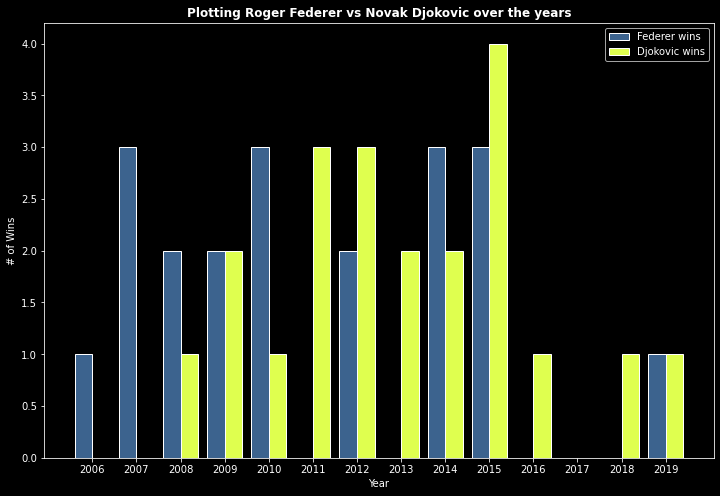

In [62]:
fed_djo_bar()

In [63]:
def get_pie_wins(Djokovic_Federer):
    '''get pie chart for percent of wins'''

    # set values and labels for chart
    values = [len(Djokovic_Federer.player_1_wins[Djokovic_Federer.player_1_wins == True]), len(Djokovic_Federer.player_1_wins[Djokovic_Federer.player_1_wins == False])] 
    labels = ['Djokovic Wins','Federer Wins', ] 

    # generate and show chart
    plt.pie(values, labels=labels, autopct='%.0f%%', textprops={'fontsize': 12}, colors=['#dfff4f', '#3C638E'])
    plt.title('Games Ending in Federer winning Represents 1/2 of the time in the last 20 years')
    plt.show()

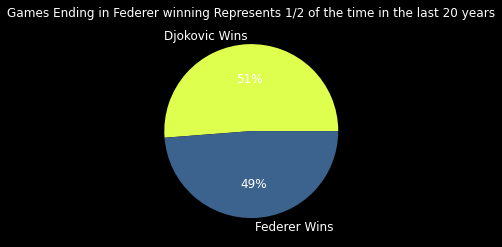

In [64]:
get_pie_wins(Djokovic_Federer)

In [65]:
fed_v_djo1 = df[df.player_1.isin(['Novak Djokovic']) & df.player_2.isin(['Roger Federer'])] 
Roger_Federer1 = df[df.player_1.isin(['Roger Federer'])] 
Roger_Federer2 = df[df.player_2.isin(['Roger Federer'])] 
Andy_djoray1 = df[df.player_1.isin(['Novak Djokovic'])]
Andy_djoray2 = df[df.player_2.isin(['Novak Djokovic'])] 

In [66]:
def get_pies_upsets(fed_v_djo1):
    "create pie charts showing upset percentage for having and not having the first move"

    # create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    # create pie chart and assign to axis object
    values = [len(fed_v_djo1.no_upset[(fed_v_djo1.player_1_wins == True) & (fed_v_djo1.no_upset == True)]),
            len(fed_v_djo1.no_upset[(fed_v_djo1.player_1_wins == True) & (fed_v_djo1.no_upset == False)])]
    labels = ['Djokovic Wins', 'Federer Wins']

    ax1.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
    ax1.title.set_text('High Ranked Player Wins')

    # create pie chart and and assign to axis object
    values = [len(fed_v_djo1.no_upset[(fed_v_djo1.player_1_wins == False) & (fed_v_djo1.no_upset == True)]),
            len(fed_v_djo1.no_upset[(fed_v_djo1.player_1_wins == False) & (fed_v_djo1.no_upset == False)])]
    labels = ['Djokovic Wins', 'Federer Wins'] 

    ax2.pie(values, labels=labels, autopct='%.0f%%', textprops={'fontsize': 12}, colors=['#dfff4f', '#3C638E'])
    ax2.title.set_text('Lower Ranked Player Wins')

    # display charts
    plt.tight_layout()
    plt.show()

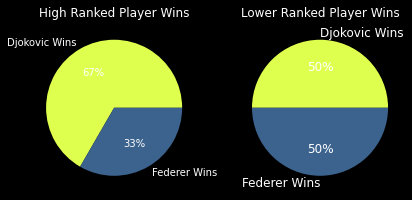

In [67]:
get_pies_upsets(fed_v_djo1)

In [68]:
def get_pie_tourney_level(fed_v_djo1):
    '''get pie chart of player win percentage for each tourney level'''

    # activate subplots objects
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    # list of charts to be generated
    levels = ['ATP', 'Finals', 'Grand_Slams', 'Masters']

    # generate graphs and assign them to subplots
    for level, ax in zip(levels, axs.ravel()):
        
        values = [len(fed_v_djo1.player_1_wins[(fed_v_djo1.player_1_wins == True) & (fed_v_djo1.tourney_level == level)]), len(fed_v_djo1.player_1_wins[(fed_v_djo1.player_1_wins == False) & (fed_v_djo1.tourney_level == level)])] 
        labels = ['Djokovic','Federer Wins']
        
        ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
        ax.set_title(f'Win Percentage for tourney {level}')
    
    # display chart
    plt.tight_layout()
    plt.show()

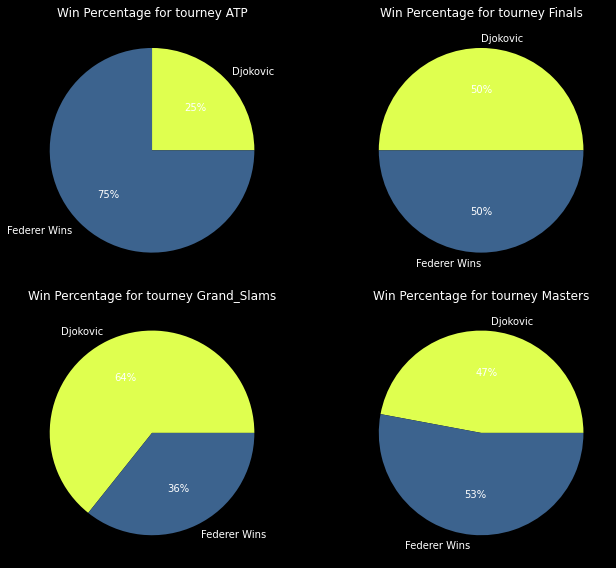

In [69]:
get_pie_tourney_level(fed_v_djo1)

In [70]:
Rodrick_Federer
Djokovic_Federer
Nadal_Federer
Murray_Federer

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner_rank,loser_rank,ht_diff,age_diff,rank_diff,rank_points_diff,no_upset,year
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-08-14,2006-422,Cincinnati Masters,Hard,64,Masters,33,7-5 6-4,3,R32,97.0,Andy Murray,Roger Federer,19.249829,25.015743,R,R,190.0,185.0,104918,103819,GBR,SUI,21.0,1.0,1210.0,7760.0,NaN,1.0,4.0,6.0,3.0,3.0,68.0,76.0,28.0,42.0,17.0,24.0,19.0,13.0,11.0,11.0,2.0,7.0,7.0,14.0,Andy Murray,0.411765,0.552632,0.607143,0.571429,7.0,5.0,True,False,True,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,21.0,1.0,5.0,-5.765914,20.0,-6550.0,False,2006
2008-03-03,2008-495,Dubai,Hard,32,ATP,1,6-7(6) 6-3 6-4,3,R32,115.0,Andy Murray,Roger Federer,20.802190,26.568104,R,R,190.0,185.0,104918,103819,GBR,SUI,11.0,1.0,1625.0,6330.0,NaN,1.0,10.0,6.0,3.0,2.0,96.0,88.0,53.0,58.0,48.0,44.0,25.0,18.0,16.0,15.0,0.0,2.0,0.0,4.0,Andy Murray,0.552083,0.659091,0.905660,0.758621,2.0,0.0,True,False,True,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,11.0,1.0,5.0,-5.765914,10.0,-4705.0,False,2008
2008-08-25,2008-560,US Open,Hard,128,Grand_Slams,127,6-2 7-5 6-2,5,F,111.0,Andy Murray,Roger Federer,21.281314,27.047228,R,R,190.0,185.0,104918,103819,GBR,SUI,6.0,2.0,2415.0,5930.0,6.0,2.0,3.0,3.0,3.0,0.0,81.0,81.0,45.0,47.0,23.0,37.0,17.0,16.0,14.0,14.0,3.0,3.0,10.0,5.0,Roger Federer,0.555556,0.580247,0.511111,0.787234,2.0,7.0,False,True,True,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,2.0,6.0,5.0,-5.765914,4.0,-3515.0,True,2008
2008-10-12,2008-1536,Madrid Masters,Hard,48,Masters,46,3-6 6-3 7-5,3,SF,117.0,Andy Murray,Roger Federer,21.415469,27.181383,R,R,190.0,185.0,104918,103819,GBR,SUI,4.0,2.0,2995.0,5930.0,4.0,2.0,14.0,7.0,2.0,1.0,86.0,98.0,53.0,65.0,45.0,46.0,17.0,18.0,15.0,15.0,2.0,7.0,3.0,9.0,Andy Murray,0.616279,0.663265,0.849057,0.707692,2.0,1.0,True,True,True,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,4.0,2.0,5.0,-5.765914,2.0,-2935.0,False,2008
2008-11-09,2008-605,Masters Cup,Hard,8,Finals,14,4-6 7-6(3) 7-5,3,RR,181.0,Andy Murray,Roger Federer,21.492129,27.258042,R,R,190.0,185.0,104918,103819,GBR,SUI,4.0,2.0,3420.0,5205.0,NaN,NaN,7.0,11.0,3.0,3.0,112.0,131.0,63.0,68.0,44.0,40.0,21.0,31.0,17.0,17.0,8.0,12.0,14.0,18.0,Andy Murray,0.562500,0.519084,0.698413,0.588235,6.0,6.0,True,False,False,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,4.0,2.0,5.0,-5.765914,2.0,-1785.0,False,2008
2009-03-12,2009-404,Indian Wells Masters,Hard,96,Masters,94,6-3 4-6 6-1,3,SF,108.0,Andy Murray,Roger Federer,21.817933,27.583847,R,R,190.0,185.0,104918,103819,GBR,SUI,4.0,2.0,7400.0,11000.0,4.0,2.0,6.0,3.0,3.0,0.0,82.0,74.0,49.0,42.0,35.0,27.0,19.0,15.0,13.0,13.0,8.0,1.0,10.0,6.0,Andy Murray,0.597561,0.567568,0.714286,0.642857,5.0,2.0,True,True,T

In [71]:
# Rodrick_Federer = Rodrick_Federer.reset_index()
# Rodrick_Federer.head(1)

In [72]:
frames = [Rodrick_Federer, Djokovic_Federer, Nadal_Federer, Murray_Federer]
result = pd.concat(frames)
result.to_csv('Federer_Rivalries.csv')


In [73]:
Fed_Rivalry = result
Fed_Rivalry

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner_rank,loser_rank,ht_diff,age_diff,rank_diff,rank_points_diff,no_upset,year
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-22,2001-328,Basel,Carpet,32,ATP,26,3-6 6-3 7-6(5),3,QF,101.0,Andy Roddick,Roger Federer,19.145791,20.205339,R,R,188.0,185.0,104053,103819,USA,SUI,16.0,13.0,1610.0,1745.0,6.0,4.0,9.0,11.0,1.0,2.0,93.0,84.0,54.0,51.0,41.0,43.0,22.0,18.0,15.0,15.0,4.0,1.0,6.0,3.0,Roger Federer,0.580645,0.607143,0.759259,0.843137,2.0,2.0,False,True,True,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,13.0,16.0,3.0,-1.059548,3.0,-135.0,True,2001
2003-06-23,2003-540,Wimbledon,Grass,128,Grand_Slams,125,7-6(6) 6-3 6-3,5,SF,103.0,Andy Roddick,Roger Federer,20.813142,21.872690,R,R,188.0,185.0,104053,103819,USA,SUI,6.0,5.0,2390.0,2580.0,5.0,4.0,4.0,17.0,0.0,0.0,99.0,84.0,57.0,51.0,42.0,42.0,21.0,25.0,15.0,15.0,5.0,2.0,8.0,2.0,Roger Federer,0.575758,0.607143,0.736842,0.823529,0.0,3.0,False,True,True,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,5.0,6.0,3.0,-1.059548,1.0,-190.0,True,2003
2003-08-04,2003-421,Canada Masters,Hard,64,Masters,62,6-4 3-6 7-6(3),3,SF,116.0,Andy Roddick,Roger Federer,20.928131,21.987680,R,R,188.0,185.0,104053,103819,USA,SUI,7.0,3.0,2630.0,3690.0,6.0,3.0,9.0,9.0,2.0,10.0,85.0,100.0,41.0,56.0,32.0,47.0,28.0,19.0,15.0,16.0,0.0,7.0,2.0,9.0,Andy Roddick,0.482353,0.560000,0.780488,0.839286,2.0,2.0,True,True,True,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,7.0,3.0,3.0,-1.059548,4.0,-1060.0,False,2003
2003-11-10,2003-605,Masters Cup,Hard,8,Finals,4,7-6(2) 6-2,3,SF,62.0,Andy Roddick,Roger Federer,21.196441,22.255989,R,R,188.0,185.0,104053,103819,USA,SUI,1.0,3.0,4335.0,3625.0,NaN,NaN,5.0,12.0,1.0,2.0,63.0,56.0,46.0,31.0,34.0,27.0,6.0,19.0,10.0,10.0,0.0,0.0,2.0,0.0,Roger Federer,0.730159,0.553571,0.739130,0.870968,0.0,2.0,False,False,False,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,3.0,1.0,3.0,-1.059548,-2.0,710.0,False,2003
2004-06-21,2004-540,Wimbledon,Grass,128,Grand_Slams,127,4-6 7-5 7-6(3) 6-4,5,F,151.0,Andy Roddick,Roger Federer,21.809719,22.869268,R,R,188.0,185.0,104053,103819,USA,SUI,2.0,1.0,4695.0,5610.0,2.0,1.0,11.0,12.0,5.0,3.0,133.0,154.0,81.0,95.0,60.0,64.0,21.0,34.0,22.0,22.0,5.0,10.0,10.0,14.0,Roger Federer,0.609023,0.616883,0.740741,0.673684,4.0,5.0,False,True,True,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1.0,2.0,3.0,-1.059548,1.0,-915.0,True,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [74]:
Fed_Rivalry.winner.value_counts()

Roger Federer     55
Novak Djokovic    21
Rafael Nadal      19
Andy Murray       10
Andy Roddick       3
Name: winner, dtype: int64

In [75]:
10 + 3 + 19 + 21

53

In [ ]:
#dfff4f

In [134]:
def rival_bar():
    years = [i for i in range(2000, 2020)]
    fedwins = [0 for i in range(2000, 2020)]
    owins = [0 for i in range(2000, 2020)]

    for index, row in Fed_Rivalry.iterrows():
        if row['winner'] != "Roger Federer":
            owins[row['year'] - 2000] += 1
        elif row['winner'] == "Roger Federer":
            fedwins[row['year'] - 2000] += 1
    plt.figure(figsize=(12,8))

    #barwith and position
    barWidth = 0.4
    r1 = np.arange(len(fedwins))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, fedwins, color='#dfff4f', width=barWidth, edgecolor='white', label='Federer wins')
    plt.bar(r2, owins, color='#3C638E', width=barWidth, edgecolor='white', label='Rival wins')

    # Add xticks on the middle of the group bars
    plt.title('Plotting Roger Federer vs Rivals over the years', fontweight='bold')
    plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(2000, 2020)])
    plt.xlabel("Year", fontsize = 16)
    plt.ylabel("# of Wins", fontsize = 16)

    # Create legend & Show graphic
    plt.legend()

In [205]:
def rival_bar():
    years = [i for i in range(2003, 2020)]
    fedwins = [0 for i in range(2003, 2020)]
    owins = [0 for i in range(2003, 2020)]

    for index, row in Fed_Rivalry.iterrows():
        if row['winner'] != "Roger Federer":
            owins[row['year'] - 2003] += 1
        elif row['winner'] == "Roger Federer":
            fedwins[row['year'] - 2003] += 1
    plt.figure(figsize=(12,8))

    #barwith and position
    barWidth = 0.4
    r1 = np.arange(len(fedwins))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, fedwins, color='#dfff4f', width=barWidth, edgecolor='white', label='Federer wins')
    plt.bar(r2, owins, color='#3C638E', width=barWidth, edgecolor='white', label='Rival wins')

    # Add xticks on the middle of the group bars
    plt.title('Roger Federer vs Rivals over the years', fontsize = 30, fontweight='bold')
    plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(2003, 2020)], fontsize = 12)
#    plt.xlabel("Year", fontsize = 16)
    plt.ylabel("# of Wins", fontsize = 16)

    # Create legend & Show graphic
    plt.legend()

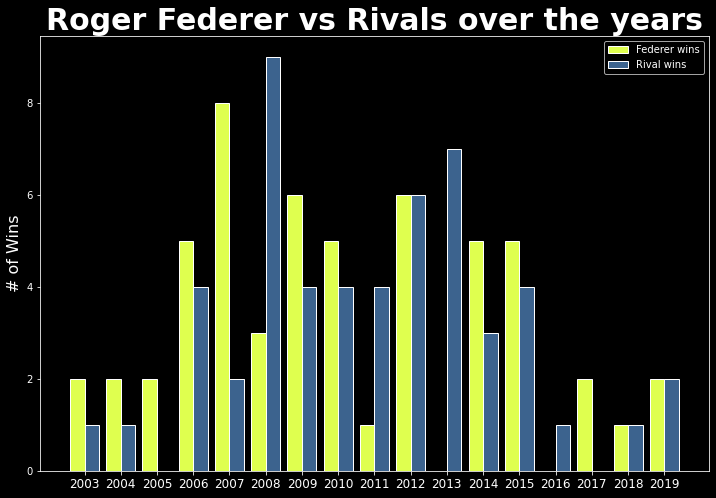

In [206]:
rival_bar()

In [190]:
def rival_bar2():
    years = [i for i in range(2003, 2018)]
    fedwins = [0 for i in range(2003, 2018)]
    owins = [0 for i in range(2003, 2018)]

    for index, row in Fed_Rivalry.iterrows():
        if row['winner'] != "Roger Federer":
            owins[row['year'] - 2003] += 1
        elif row['winner'] == "Roger Federer":
            fedwins[row['year'] - 2003] += 1
    plt.figure(figsize=(12,8))

    #barwith and position
    barWidth = 0.4
    r1 = np.arange(len(fedwins))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, fedwins, color='#dfff4f', width=barWidth, edgecolor='white', label='Federer wins')
    plt.bar(r2, owins, color='#3C638E', width=barWidth, edgecolor='white', label='Rival wins')

    # Add xticks on the middle of the group bars
    plt.title('Plotting Roger Federer vs Rivals over the years', fontsize = 30, fontweight='bold')
    plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(2003, 2018)])
    plt.xlabel("Year", fontsize = 16)
    plt.ylabel("# of Wins", fontsize = 16)

    # Create legend & Show graphic
    plt.legend()

In [189]:
rival_bar2()

IndexError: list index out of range

In [ ]:
# import matplotlib.pyplot as plt


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 35, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
# men_std = [2, 3, 4, 1, 2]
# women_std = [3, 5, 2, 3, 3]
# width = 0.35       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()

# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
# ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#        label='Women')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

# plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

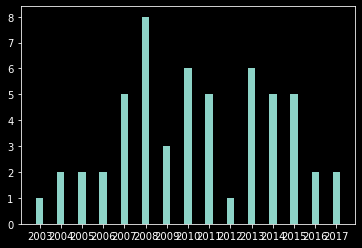

In [166]:
labels = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
         '2014', '2015', '2016', '2017']
fed_count = [1, 2, 2, 2, 5, 8, 3, 6, 5, 1, 6, 5, 5, 2, 2]
rival_count =[0, 1, 1, 4, 2, 9, 4, 4, 4, 6, 7, 3, 4, 1, 1, 2]
width = 0.35
fig, ax = plt.subplots()
ax.bar(labels, fed_count, width, label='Federer Wins')
ax.bar(labels, rival_count, width, bottom=fed_count, label = 'Rival Wins')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show();

In [160]:
#loss_count = df.groupby('loser_id')[['loser_name']].agg('count').sort_values(by='loser_id').astype(int).reset_index()
Fed = Fed_Rivalry[Fed_Rivalry.winner != 'Roger Federer']
Fed
Fed.groupby('year').agg('count')

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner_rank,loser_rank,ht_diff,age_diff,rank_diff,rank_points_diff,no_upset
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2006,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2007,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2008,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,7,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2009,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2010,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2011,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2012,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [78]:
def get_pie_wins_rivals():
    '''get pie chart for percent of wins'''

    # set values and labels for chart
    values = [len(Fed_Rivalry.player_1_wins[Fed_Rivalry.player_1_wins == True]), len(Fed_Rivalry.player_1_wins[Fed_Rivalry.player_1_wins == False])] 
    labels = ['Rival Wins','Federer Wins', ] 
    
    ### increases thickness
    
    # generate and show chart
    plt.pie(values, labels=labels, autopct='%.0f%%', textprops={'color':"orange"}, colors=['#dfff4f', '#3C638E'])
    #plt.title('Games Ending in Federer winning Represents 1/2 of the time in the last 20 years')
    plt.show()

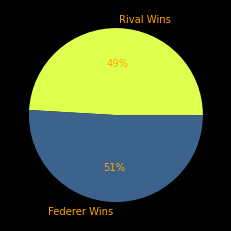

In [79]:
get_pie_wins_rivals()

In [80]:
fed_v_riv = df[df.player_1.isin([['Novak Djokovic', 'Rafael Nadal', 'Andy Murray', 'Andy Roddick ']]) & df.player_2.isin(['Roger Federer'])] 
Roger_Federer1 = df[df.player_1.isin(['Roger Federer'])] 
Roger_Federer2 = df[df.player_2.isin(['Roger Federer'])] 
Riv1 = df[df.player_1.isin([['Novak Djokovic', 'Rafael Nadal', 'Andy Murray', 'Andy Roddick ']])]
Riv1 = df[df.player_2.isin([['Novak Djokovic', 'Rafael Nadal', 'Andy Murray', 'Andy Roddick ']])] 

In [81]:
fed_v_riv

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner_rank,loser_rank,ht_diff,age_diff,rank_diff,rank_points_diff,no_upset,year
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [82]:
def get_pie_tourney_level():
    '''get pie chart of player win percentage for each tourney level'''

    # activate subplots objects
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    # list of charts to be generated
    levels = ['ATP', 'Finals', 'Grand_Slams', 'Masters']

    # generate graphs and assign them to subplots
    for level, ax in zip(levels, axs.ravel()):
        
        values = [len(fed_v_riv.player_1_wins[(fed_v_riv.player_1_wins == True) & (fed_v_riv.tourney_level == level)]), len(fed_v_riv.player_1_wins[(fed_v_riv.player_1_wins == False) & (fed_v_riv.tourney_level == level)])] 
        labels = ['Djokovic','Federer Wins']
        
        ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
        ax.set_title(f'Win Percentage for tourney {level}')
    
    # display chart
    plt.tight_layout()
    plt.show()

In [83]:
Fed_Rivalry.tourney_level.value_counts()

Masters        46
Grand_Slams    35
Finals         18
ATP             9
Name: tourney_level, dtype: int64

In [84]:
Fed_Rivalry.tourney_name.value_counts()

Tour Finals             12
Australian Open         11
Cincinnati Masters      10
Wimbledon               10
US Open                  9
Dubai                    6
Masters Cup              6
Miami Masters            6
Monte Carlo Masters      6
Rome Masters             5
Shanghai Masters         5
Roland Garros            5
Indian Wells Masters     5
Canada Masters           4
Hamburg Masters          2
Madrid Masters           2
Basel                    2
Paris Masters            1
London Olympics          1
Name: tourney_name, dtype: int64

In [85]:
Fed_Rivalry['round'].value_counts()

F      44
SF     40
QF      9
RR      9
R32     4
R64     1
R16     1
Name: round, dtype: int64

In [86]:
# # Creating 4 dataframes for Grandslams
# Roland_Garros_df = df[df.tourney_name == 'Roland Garros']
# Wimbledon_df = df[df.tourney_name == 'Wimbledon']
# US_Open_df = df[df.tourney_name == 'US Open']
# Australian_Open_df = df[df.tourney_name == 'Australian Open']

In [87]:
grand_list = ['Roland Garros', 'Wimbledon', 'US Open', 'Australian Open']
grand_df = df[df['tourney_name'].isin(grand_list)]
grand_df.shape

(7277, 86)

In [88]:
# Creating 4 dataframes for Grandslams
Roland_Garros_Fed_Rivalry = Fed_Rivalry[Fed_Rivalry.tourney_name == 'Roland Garros']
Wimbledon_Fed_Rivalry = Fed_Rivalry[Fed_Rivalry.tourney_name == 'Wimbledon']
US_Open_Fed_Rivalry = Fed_Rivalry[Fed_Rivalry.tourney_name == 'US Open']
Australian_Open_Fed_Rivalry = Fed_Rivalry[Fed_Rivalry.tourney_name == 'Australian Open']

In [89]:
grand_list = ['Roland Garros', 'Wimbledon', 'US Open', 'Australian Open']
grand_df = Fed_Rivalry[Fed_Rivalry['tourney_name'].isin(grand_list)]
grand_df.shape

(35, 86)

In [90]:
# Finals, SF, QF
grand_df['round'].value_counts()

SF     16
F      16
QF      2
R16     1
Name: round, dtype: int64

In [91]:
#database of Grand Slam Finals with Federer
grand_winners = grand_df[grand_df['round']== 'F']


In [92]:
sf_winners = grand_df[grand_df['round']== 'SF']
sf_winners.winner.value_counts()

Roger Federer     7
Novak Djokovic    6
Rafael Nadal      2
Andy Murray       1
Name: winner, dtype: int64

In [93]:
grand_winners.winner.value_counts()

Roger Federer     8
Rafael Nadal      5
Novak Djokovic    3
Name: winner, dtype: int64

In [94]:
df.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner_rank,loser_rank,ht_diff,age_diff,rank_diff,rank_points_diff,no_upset,year
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-11,1999-338,Sydney,Hard,32,ATP,16,7-6(1) 6-1,3,R32,84.0,Lleyton Hewitt,Patrick Rafter,17.878166,26.036961,R,R,180.0,185.0,103720,102158,AUS,AUS,104.0,4.0,456.0,3315.0,NaN,2.0,2.0,0.0,0.0,5.0,73.0,59.0,51.0,36.0,32.0,24.0,14.0,8.0,10.0,9.0,4.0,3.0,6.0,7.0,Lleyton Hewitt,0.69863,0.610169,0.627451,0.666667,4.0,2.0,True,False,True,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,104.0,4.0,-5.0,-8.158795,100.0,-2859.0,False,1999


In [95]:
df.tourney_level.value_counts()

ATP            20061
Masters         8122
Grand_Slams     7277
Finals           295
Davis            212
Name: tourney_level, dtype: int64

In [96]:
df['year'] = df.year.astype(int)
df['year'].dtype

dtype('int64')

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors


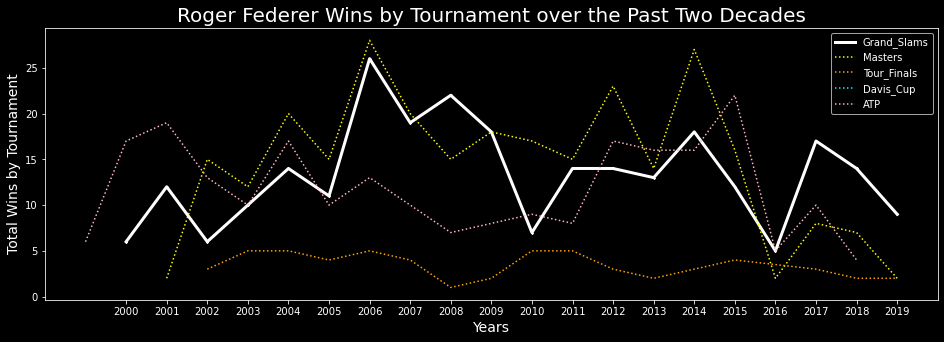

In [167]:
rf1 = df[(df['winner'] == 'Roger Federer')].groupby(['year','tourney_level'], as_index=False).agg(['count'])
rf2 = rf1['tourney_id'].reset_index()
#plt.style.use('default')
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)
#jet = cm = plt.get_cmap('jet')

ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 2, endpoint=True))))
plt.xticks(np.arange(2000, 2020))
plt.title('Roger Federer Wins by Tournament over the Past Two Decades', fontsize = 20)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Total Wins by Tournament", fontsize = 14)

plt.plot(rf2[rf2['tourney_level']=='Grand_Slams']['year'], rf2[rf2['tourney_level']=='Grand_Slams']['count'], marker='*', markersize=2, linewidth=3, color = "w")
plt.plot(rf2[rf2['tourney_level']=='Masters']['year'], rf2[rf2['tourney_level']=='Masters']['count'], linestyle='dotted', color = "yellow")
plt.plot(rf2[rf2['tourney_level']=='Finals']['year'], rf2[rf2['tourney_level']=='Finals']['count'], linestyle='dotted', color = "orange")
plt.plot(rf2[rf2['tourney_level']=='Davis']['year'], rf2[rf2['tourney_level']=='Davis']['count'], linestyle='dotted', color = "aqua")
plt.plot(rf2[rf2['tourney_level']=='ATP']['year'], rf2[rf2['tourney_level']=='ATP']['count'], linestyle='dotted', color = "lightpink")
plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10});

In [99]:
def Federer_Years():
    rf1 = df[(df['winner'] == 'Roger Federer')].groupby(['year','tourney_level'], as_index=False).agg(['count'])
    rf2 = rf1['tourney_id'].reset_index()

    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(1,1,1)
    #jet = cm = plt.get_cmap('jet')

    ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 2, endpoint=True))))
    plt.xticks(np.arange(2000, 2020))
    plt.title('Roger Federer Wins by Tournament over the Past Two Decades')
    plt.xlabel("Years")
    plt.ylabel("Total Wins")


    plt.plot(rf2[rf2['tourney_level']=='G']['year'], rf2[rf2['tourney_level']=='G']['count'], marker='*', markersize=2, linewidth=3)
    plt.plot(rf2[rf2['tourney_level']=='M']['year'], rf2[rf2['tourney_level']=='M']['count'], linestyle='dotted')
    plt.plot(rf2[rf2['tourney_level']=='F']['year'], rf2[rf2['tourney_level']=='F']['count'], linestyle='dotted')
    plt.plot(rf2[rf2['tourney_level']=='D']['year'], rf2[rf2['tourney_level']=='D']['count'], linestyle='dotted')
    plt.plot(rf2[rf2['tourney_level']=='A']['year'], rf2[rf2['tourney_level']=='A']['count'], linestyle='dotted')
    plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10});

In [100]:
######## FED TOTAL MATCHES

In [101]:
fed_matches = df[(df.player_1 == 'Roger Federer') | (df.player_2 == 'Roger Federer')]
fed_matches.shape

(1029, 86)

In [183]:
def fed_matches_bar():
    years = [i for i in range(1999, 2020)]
    fedwins = [0 for i in range(1999, 2020)]
    owins = [0 for i in range(1999, 2020)]

    for index, row in fed_matches.iterrows():
        if row['winner'] != "Roger Federer":
            owins[row['year'] - 1999] += 1
        elif row['winner'] == "Roger Federer":
            fedwins[row['year'] - 1999] += 1
    plt.figure(figsize=(12,8))

    #barwith and position
    barWidth = 0.4
    r1 = np.arange(len(fedwins))
    r2 = [x + barWidth for x in r1]
#3C638E
    # Make the plot
    plt.bar(r1, fedwins, color='#dfff4f', width=barWidth, edgecolor='white', label='Federer wins')
    plt.bar(r2, owins, color='#3C638E', width=barWidth, edgecolor='white', label='Competition wins')

    # Add xticks on the middle of the group bars
    plt.title('Twenty Years of Federer Domination', fontsize = 30, fontweight='bold')
    plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(1999, 2020)], fontsize = 8)
    #plt.xlabel("Year", fontsize = 20)
    plt.ylabel("# of Wins", fontsize = 25)

    # Create legend & Show graphic
    plt.legend()

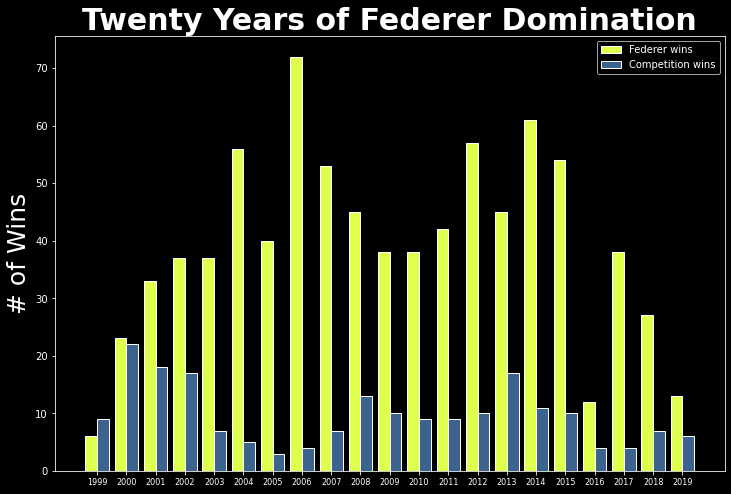

In [184]:
fed_matches_bar()

In [104]:
fed_matches.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner_rank,loser_rank,ht_diff,age_diff,rank_diff,rank_points_diff,no_upset,year
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-02-01,1999-496,Marseille,Hard,32,ATP,25,6-3 6-3,3,QF,70.0,Arnaud Clement,Roger Federer,21.125257,17.483915,R,R,173.0,185.0,103096,103819,FRA,SUI,103.0,243.0,472.0,173.0,NaN,NaN,1.0,3.0,2.0,6.0,45.0,65.0,23.0,37.0,21.0,21.0,9.0,11.0,9.0,9.0,1.0,5.0,3.0,10.0,Arnaud Clement,0.511111,0.569231,0.913043,0.567568,5.0,2.0,True,False,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,103.0,243.0,-12.0,3.641342,-140.0,299.0,True,1999


In [105]:
fed_v_djo1 = df[df.player_1.isin(['Novak Djokovic']) & df.player_2.isin(['Roger Federer'])] 
Roger_Federer1 = df[df.player_1.isin(['Roger Federer'])] 
Roger_Federer2 = df[df.player_2.isin(['Roger Federer'])] 
Andy_djoray1 = df[df.player_1.isin(['Novak Djokovic'])]
Andy_djoray2 = df[df.player_2.isin(['Novak Djokovic'])]

In [106]:
fed_v_riv = df[df.winner.isin(['Roger Federer']) & ~df.winner.isin(['Roger Federer'])] 


# Roger_Federer1 = df[df.player_1.isin(['Roger Federer'])] 
# Roger_Federer2 = df[df.player_2.isin(['Roger Federer'])] 
# Riv1 = df[df.player_1.isin([['Novak Djokovic', 'Rafael Nadal', 'Andy Murray', 'Andy Roddick ']])]
# Riv1 = df[df.player_2.isin([['Novak Djokovic', 'Rafael Nadal', 'Andy Murray', 'Andy Roddick ']])] 

In [107]:
fed_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner_rank,loser_rank,ht_diff,age_diff,rank_diff,rank_points_diff,no_upset,year
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-02-01,1999-496,Marseille,Hard,32,ATP,25,6-3 6-3,3,QF,70.0,Arnaud Clement,Roger Federer,21.125257,17.483915,R,R,173.0,185.0,103096,103819,FRA,SUI,103.0,243.0,472.0,173.0,NaN,NaN,1.0,3.0,2.0,6.0,45.0,65.0,23.0,37.0,21.0,21.0,9.0,11.0,9.0,9.0,1.0,5.0,3.0,10.0,Arnaud Clement,0.511111,0.569231,0.913043,0.567568,5.0,2.0,True,False,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,103.0,243.0,-12.0,3.641342,-140.0,299.0,True,1999
1999-02-01,1999-496,Marseille,Hard,32,ATP,17,6-7(6) 7-6(5) 7-6(5),3,R16,140.0,Jerome Golmard,Roger Federer,25.396304,17.483915,L,R,188.0,185.0,102259,103819,FRA,SUI,63.0,243.0,743.0,173.0,NaN,NaN,14.0,12.0,8.0,5.0,121.0,115.0,67.0,73.0,54.0,63.0,30.0,19.0,18.0,18.0,4.0,3.0,6.0,5.0,Roger Federer,0.553719,0.634783,0.805970,0.863014,2.0,2.0,False,False,False,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,243.0,63.0,3.0,7.912389,-180.0,570.0,False,1999
1999-02-01,1999-496,Marseille,Hard,32,ATP,1,7-6(1) 3-6 6-3,3,R32,113.0,Carlos Moya,Roger Federer,22.431211,17.483915,R,R,190.0,185.0,102845,103819,ESP,SUI,5.0,243.0,3178.0,173.0,1.0,NaN,9.0,3.0,2.0,10.0,105.0,110.0,52.0,46.0,37.0,36.0,28.0,32.0,15.0,15.0,6.0,5.0,9.0,8.0,Roger Federer,0.495238,0.418182,0.711538,0.782609,3.0,3.0,False,True,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,243.0,5.0,5.0,4.947296,-238.0,3005.0,False,1999
1999-02-15,1999-407,Rotterdam,Carpet,32,ATP,23,6-4 7-5,3,R16,65.0,Bohdan Ulihrach,Roger Federer,23.978097,17.522245,R,R,188.0,185.0,102539,103819,CZE,SUI,30.0,178.0,1155.0,262.0,NaN,NaN,5.0,10.0,4.0,3.0,70.0,55.0,41.0,37.0,33.0,31.0,12.0,13.0,11.0,11.0,5.0,0.0,7.0,0.0,Roger Federer,0.585714,0.672727,0.804878,0.837838,0.0,2.0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,178.0,30.0,3.0,6.455852,-148.0,893.0,False,1999
1999-02-15,1999-407,Rotterdam,Carpet,32,ATP,28,6-1 5-7 6-4,3,QF,109.0,Roger Federer,Yevgeny Kafelnikov,17.522245,24.991102,R,R,185.0,190.0,103819,102338,SUI,RUS,178.0,2.0,262.0,3350.0,NaN,2.0,6.0,6.0,6.0,6.0,93.0,93.0,39.0,57.0,25.0,38.0,27.0,18.0,14.0,15.0,10.0,3.0,16.0,7.0,Yevgeny Kafelnikov,0.419355,0.612903,0.641026,0.666667,4.0,6.0,False,False,True,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,2.0,178.0,-5.0,-7.468857,176.0,-3088.0,True,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [108]:
def get_pie_tourney_level():
    '''get pie chart of player win percentage for each tourney level'''

    # activate subplots objects
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    # list of charts to be generated
    levels = ['ATP', 'Finals', 'Grand_Slams', 'Masters']

    # generate graphs and assign them to subplots
    for level, ax in zip(levels, axs.ravel()):
        
        values = [len(fed_v_riv.winner[('Roger Federer' == True) & (fed_v_riv.tourney_level == level)]), len(fed_v_riv.winner[('Roger Federer' == True) & (fed_v_riv.tourney_level == level)])] 
        labels = ['Djokovic','Federer Wins']
        
        ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
        ax.set_title(f'Win Percentage for tourney {level}')
    
    # display chart
    plt.tight_layout()
    plt.show()

<ipython-input-108-20ed0ffec2ee>:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])


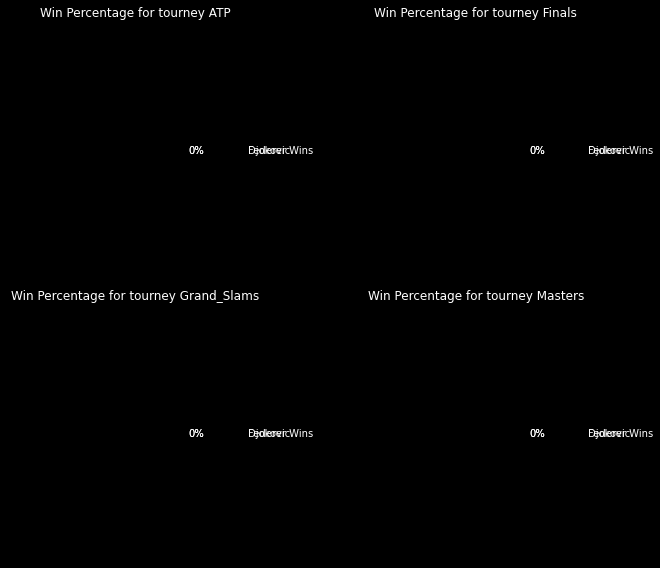

In [109]:
get_pie_tourney_level()

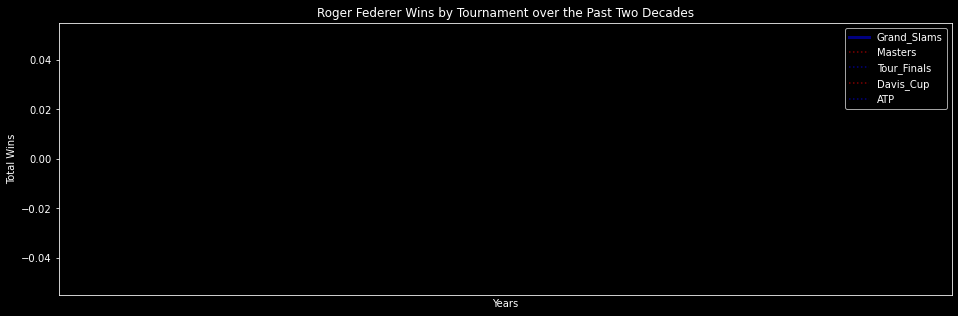

In [110]:
Federer_Years()

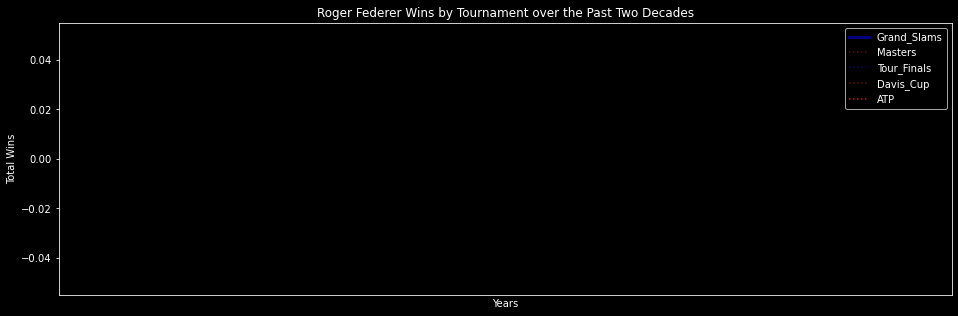

In [111]:
rf1 = df[(df['winner'] == 'Roger Federer')].groupby(['year','tourney_level'], as_index=False).agg(['count'])
rf2 = rf1['tourney_id'].reset_index()

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)
#jet = cm = plt.get_cmap('jet')

ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 2, endpoint=True))))
plt.xticks(np.arange(2005, 2009))
plt.title('Roger Federer Wins by Tournament over the Past Two Decades')
plt.xlabel("Years")
plt.ylabel("Total Wins")
plt.savefig('federer20')

plt.plot(rf2[rf2['tourney_level']=='G']['year'], rf2[rf2['tourney_level']=='G']['count'], marker='*', markersize=2, linewidth=3)
plt.plot(rf2[rf2['tourney_level']=='M']['year'], rf2[rf2['tourney_level']=='M']['count'], linestyle='dotted')
plt.plot(rf2[rf2['tourney_level']=='F']['year'], rf2[rf2['tourney_level']=='F']['count'], linestyle='dotted')
plt.plot(rf2[rf2['tourney_level']=='D']['year'], rf2[rf2['tourney_level']=='D']['count'], linestyle='dotted')
plt.plot(rf2[rf2['tourney_level']=='A']['year'], rf2[rf2['tourney_level']=='A']['count'], linestyle='dotted', color = "r")
plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10});

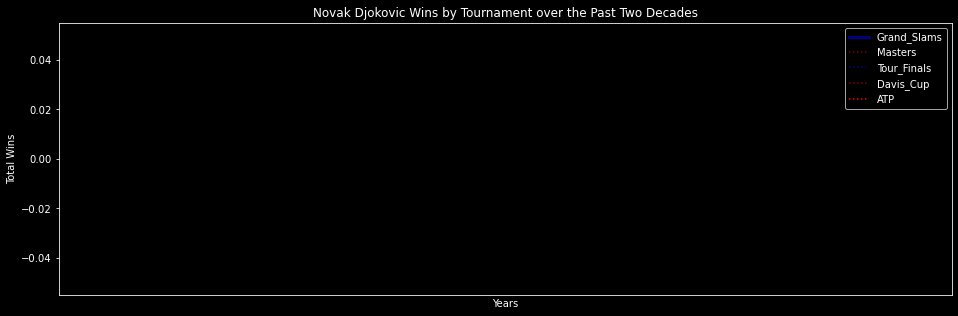

In [112]:
rf1 = df[(df['winner'] == 'Novak Djokovic')].groupby(['year','tourney_level'], as_index=False).agg(['count'])
rf2 = rf1['tourney_id'].reset_index()

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)
#jet = cm = plt.get_cmap('jet')

ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 2, endpoint=True))))
plt.xticks(np.arange(2000, 2020))
plt.title('Novak Djokovic Wins by Tournament over the Past Two Decades')
plt.xlabel("Years")
plt.ylabel("Total Wins")


plt.plot(rf2[rf2['tourney_level']=='G']['year'], rf2[rf2['tourney_level']=='G']['count'], marker='*', markersize=2, linewidth=3)
plt.plot(rf2[rf2['tourney_level']=='M']['year'], rf2[rf2['tourney_level']=='M']['count'], linestyle='dotted')
plt.plot(rf2[rf2['tourney_level']=='F']['year'], rf2[rf2['tourney_level']=='F']['count'], linestyle='dotted')
plt.plot(rf2[rf2['tourney_level']=='D']['year'], rf2[rf2['tourney_level']=='D']['count'], linestyle='dotted')
plt.plot(rf2[rf2['tourney_level']=='A']['year'], rf2[rf2['tourney_level']=='A']['count'], linestyle='dotted', color = "r")
plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10});

In [113]:
levels = ['ATP', 'Finals', 'Grand Slams', 'Masters']

In [114]:
#df.head()
# rival_50 = PD_merge_50[PD_merge_50.Player_Name_x.isin(player_list)]
# rival_50

player_list = ['Roger Federer', 'Andy Roddick', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']
FR = df[df]

ValueError: Boolean array expected for the condition, not object

In [ ]:
FR = Fed_Rivalry
FR.columns = FR.iloc[2]
FR

60 - 64

In [ ]:
get_pies_upsets_fed_v_riv()

---- Filter for rank 23-80